# Libraries & Custom functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

# Ignore UserWarning
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# Define function that implements the binary cross entropy loss function
def binary_cross_entropy(y_true, y_hat):
    loss = -1 * (y_true * torch.log(y_hat) + (1 - y_true) * torch.log(1 - y_hat))
    cost = torch.mean(loss)
    return loss, cost


def forward_pass(x, h, h_0, v, b, y_true, w):
    # Compute h1 and h2
    linear_comb = np.matmul(w.T, x)
    h[0] = linear_comb[0] + v * h_0 + b
    h[1] = linear_comb[1] + v * h[0] + b
    h = F.sigmoid(h)
    y_hat = h
    # Compute the loss
    loss, cost = binary_cross_entropy(y_true, y_hat)
    return y_hat, loss, cost


# Implement the backward pass of a RNN
def backward_pass(x, y_true, y_hat):
    # Compute the gradient of the loss with respect to y_hat
    grad_y_hat = -1 * (y_true / y_hat - (1 - y_true) / (1 - y_hat))
    # Compute the gradient of the loss with respect to h
    grad_h = grad_y_hat * y_hat * (1 - y_hat)
    # Compute the gradient of the loss with respect to w
    grad_w = grad_h * x
    return grad_y_hat, grad_h, torch.diag(grad_w)


def update_weights(w, grad_w, learning_rate):
    return w - learning_rate * grad_w


# Implement a simple RNN that only updates the weights
def SimpleRNN(x, y_true, w, v, b, learning_rate = 0.1, epochs = 1000):
    # Initialize hidden state
    h = torch.zeros(2)
    cost_values = []
    for i in range(epochs):
        h_0 = 0
        # Forward pass
        y_hat, loss, cost = forward_pass(x, h, h_0, v, b, y_true, w)
        # Compute loss
        loss, cost = binary_cross_entropy(y_true, y_hat)
        cost_values.append(cost)
        # Backward pass
        grad_y_hat, grad_h, grad_w = backward_pass(x, y_true, y_hat)
        # Update weights
        w = update_weights(w, grad_w, learning_rate)
        # Print progress
        if i % 500 == 0:
            print("Epoch {}: cost = {}".format(i, cost))
    return cost_values, w


def PlotCost(cost_values):
    plt.plot(cost_values)
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.show()

# Exercise 2, a)

In [3]:
# Defining the variables
x = torch.tensor([[0.3, 0.1], 
                  [-0.2, 0.1]])
w = torch.tensor([1, -1])
v = -1
b = 0
h = torch.tensor([0.0, 0.0])
h_0 = torch.tensor([0.0])
y_true = torch.tensor([1, 0])

## i)

In [4]:
y_hat, loss, cost = forward_pass(x, h, h_0, v, b, y_true, w)

# print the results
print("The predicted value is y_hat = {}".format(y_hat))
print("The loss is {}".format(loss))
print("The cost is {}".format(cost))

The predicted value is y_hat = tensor([0.6225, 0.3775])
The loss is tensor([0.4741, 0.4741])
The cost is 0.4740769863128662


## ii)

In [5]:
grad_y_hat, grad_h, grad_w = backward_pass(x, y_true, y_hat)

learning_rate = 0.1
w_new = update_weights(w, grad_w, learning_rate)

# print the results
print("The new weight vector is {}".format(w_new))

The new weight vector is tensor([ 1.0113, -1.0038])


## Extra (improving the RNN's cost with more epochs)

In [6]:
costs, w = SimpleRNN(x, y_true, w, v, b, learning_rate = 0.1, epochs = 10000)

Epoch 0: cost = 0.4740769863128662
Epoch 500: cost = 0.17204156517982483
Epoch 1000: cost = 0.10100055485963821
Epoch 1500: cost = 0.07100844383239746
Epoch 2000: cost = 0.05465693771839142
Epoch 2500: cost = 0.04440512880682945
Epoch 3000: cost = 0.03738802298903465
Epoch 3500: cost = 0.03228724002838135
Epoch 4000: cost = 0.028413593769073486
Epoch 4500: cost = 0.02537236548960209
Epoch 5000: cost = 0.022921470925211906
Epoch 5500: cost = 0.020904306322336197
Epoch 6000: cost = 0.019215088337659836
Epoch 6500: cost = 0.017779890447854996
Epoch 7000: cost = 0.016545312479138374
Epoch 7500: cost = 0.015472032129764557
Epoch 8000: cost = 0.01453043520450592
Epoch 8500: cost = 0.013697549700737
Epoch 9000: cost = 0.012955603189766407
Epoch 9500: cost = 0.012290406972169876


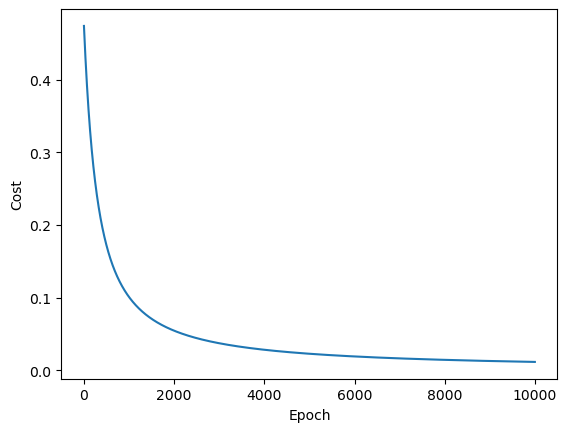

The final weight vector is tensor([11.9417, -6.0026])


In [7]:
PlotCost(costs)
print("The final weight vector is {}".format(w))